<a href="https://colab.research.google.com/github/vvicky30/machine-learning/blob/supervised-ml/logistic_regression_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Customer churn with Logistic Regression
"""
A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. 
They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.

Lets first import required libraries:
"""
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
#Click here and press Shift+Enter
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2020-02-09 17:47:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.30K  --.-KB/s    in 0.02s   

2020-02-09 17:47:31 (1.40 MB/s) - ‘ChurnData.csv’ saved [36144/36144]



In [4]:
#Load Data From CSV File
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [6]:
#Data pre-processing and selection
#Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement by the skitlearn algorithm:

churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')#convert  target to the integer-type
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [10]:
# write your code here
print(churn_df.shape)
print(churn_df.columns)

(200, 10)
Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'churn'],
      dtype='object')


In [12]:
#Lets define X, and y for our dataset:

X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
print("x:-",X[0:5])
y = np.asarray(churn_df['churn'])
print("y:-",y [0:5])

x:- [[ 11.  33.   7. 136.   5.   5.   0.]
 [ 33.  33.  12.  33.   2.   0.   0.]
 [ 23.  30.   9.  30.   1.   2.   0.]
 [ 38.  35.   5.  76.   2.  10.   1.]
 [  7.  35.  14.  80.   2.  15.   0.]]
y:- [1 1 0 0 0]


In [13]:
#also, we normalize the dataset:

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [15]:
#Train/Test dataset
#Okay, we split our dataset into train and test set:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [16]:
"""
Lets build our model using LogisticRegression from Scikit-learn package. 
This function implements logistic regression and can use different numerical optimizers to find parameters, including:-
 ### ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. 

The version of Logistic Regression in Scikit-learn, support regularization. 
Regularization is a technique used to solve the overfitting problem in machine learning models. 
C parameter indicates inverse of regularization strength which must be a positive float. Smaller values specify stronger regularization. 
"""
#Now lets fit our model with train set:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
#Now we can predict using our test set:

yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [23]:
#predict_proba returns estimates for all classes, ordered by the label of classes. 
#So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

yhat_prob = LR.predict_proba(X_test)
print(yhat_prob)
print(yhat_prob.shape)#same as x_test ,only coulumns changed as here in probability there are two coulumn for class=1 & class =0
print(X_test.shape)#here there are total 7 coulumns corresponds to all 7 features

[[0.54132919 0.45867081]
 [0.60593357 0.39406643]
 [0.56277713 0.43722287]
 [0.63432489 0.36567511]
 [0.56431839 0.43568161]
 [0.55386646 0.44613354]
 [0.52237207 0.47762793]
 [0.60514349 0.39485651]
 [0.41069572 0.58930428]
 [0.6333873  0.3666127 ]
 [0.58068791 0.41931209]
 [0.62768628 0.37231372]
 [0.47559883 0.52440117]
 [0.4267593  0.5732407 ]
 [0.66172417 0.33827583]
 [0.55092315 0.44907685]
 [0.51749946 0.48250054]
 [0.485743   0.514257  ]
 [0.49011451 0.50988549]
 [0.52423349 0.47576651]
 [0.61619519 0.38380481]
 [0.52696302 0.47303698]
 [0.63957168 0.36042832]
 [0.52205164 0.47794836]
 [0.50572852 0.49427148]
 [0.70706202 0.29293798]
 [0.55266286 0.44733714]
 [0.52271594 0.47728406]
 [0.51638863 0.48361137]
 [0.71331391 0.28668609]
 [0.67862111 0.32137889]
 [0.50896403 0.49103597]
 [0.42348082 0.57651918]
 [0.71495838 0.28504162]
 [0.59711064 0.40288936]
 [0.63808839 0.36191161]
 [0.39957895 0.60042105]
 [0.52127638 0.47872362]
 [0.65975464 0.34024536]
 [0.5114172  0.4885828 ]]

In [28]:
#Evaluation
"""jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. 
If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.
"""
from sklearn.metrics import jaccard_similarity_score
print("accuracy of model",jaccard_similarity_score(y_test, yhat))

accuracy of model 0.75


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [0]:
#confusion matrix
#Another way of looking at accuracy of classifier is to look at confusion matrix.

from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


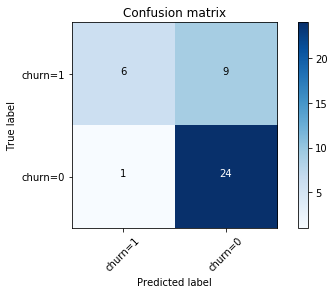

In [38]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [0]:
#explanation:-
"""
Look at first row. The first row is for customers whose actual churn value in test set is 1. As you can calculate, 
out of 40 customers, the churn value of 15 of them is 1. And out of these 15, the classifier correctly predicted 6 of them as 1, and 9 of them as 0.
It means, for 6 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. 
However, while the actual label of 9 customers were 1, the classifier predicted those as 0, which is not very good. 
We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row. It looks like there were 25 customers whom their churn value were 0.

The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. 
A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes. In specific case of binary classifier, 
such as this example,
we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.
"""

In [39]:
print (classification_report(y_test, yhat))



              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [0]:
"""
Based on the count of each section, we can calculate precision and recall of each label:
 #Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)
 #Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)
So, we can calculate precision and recall of each class.
 #F1 score: Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label.
"""

In [41]:
#log loss
#Now, lets try log loss for evaluation. In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). 
#This probability is a value between 0 and 1. Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a 
#probability value between 0 and 1.

from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6017092478101185